# End of Distribution Imputation
   - Replacing the missing the data values that are at the tails of the distribution of the variable.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib as inline

UsageError: unrecognized arguments: inline


In [3]:
df = pd.read_csv("train.csv",usecols=['Age','Survived','Fare'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<AxesSubplot: >

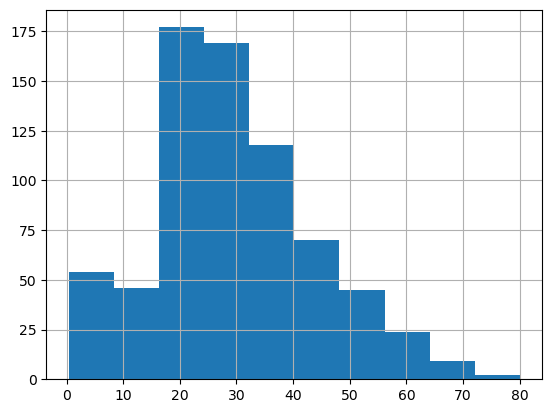

In [7]:
df.Age.hist()

In [9]:
# getting the mean value which is the central value of the column.
df.Age.mean()

29.69911764705882

In [22]:
# picking the end of the distribution.
# mean --> central value of the column values.
# choosing the data after the 3 standard deviation.
extreme = df.Age.mean() + 3 * df.Age.std()

<AxesSubplot: >

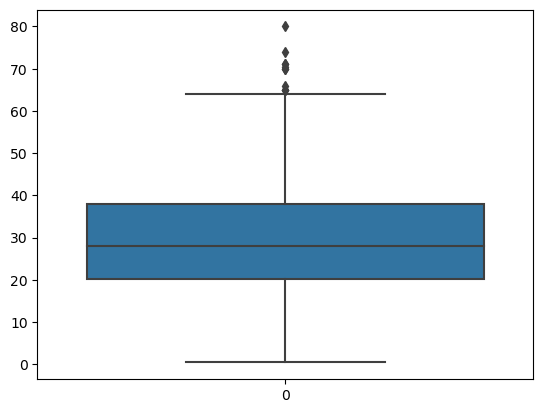

In [23]:
# seeing the outliers
import seaborn as sns
sns.boxplot(df['Age'])

In [36]:
median = df.Age.median()

In [37]:
def impute_nan(df,variable,extreme):
    df[variable+'_end_distri'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace= True)

In [38]:
impute_nan(df,'Age',extreme)

In [39]:
df.head(20)

,Survived,Age,Fare,Age_end_distri
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot: >

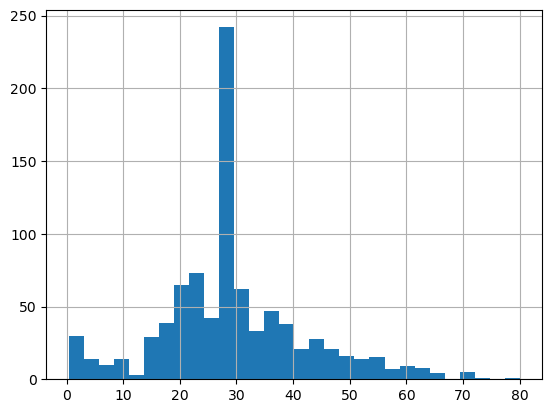

In [40]:
# replaces all the NAN a large variance is displayed in the graph using histogram.
df['Age'].hist(bins=30)

<AxesSubplot: >

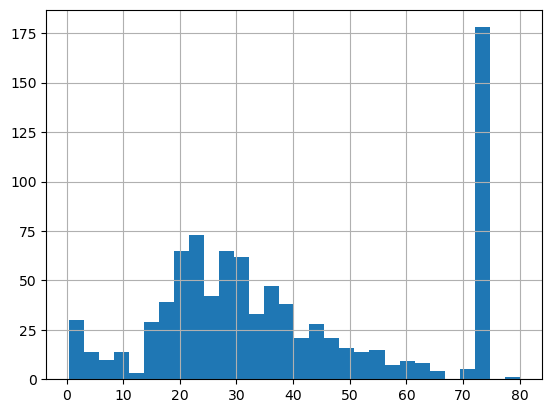

In [41]:
# Having an extreme value in place of NAN values.
df['Age_end_distri'].hist(bins=30)

<AxesSubplot: >

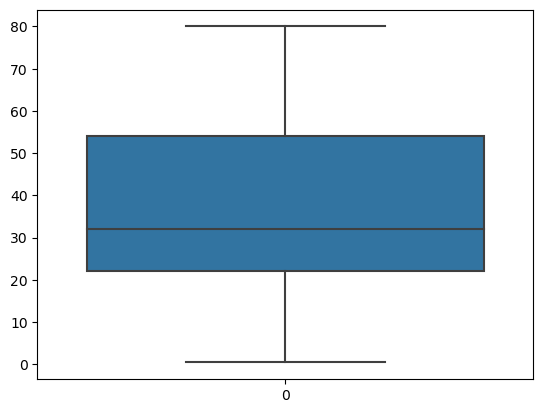

In [43]:
# The outliers are gone.
sns.boxplot(df['Age_end_distri'])

# Advantages
    - Easy to implement
    - captures the importances of missigness if there is one.
# Disadvantages
    - Disorts the original distribution of the variable